In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'Predicted house price ($)')

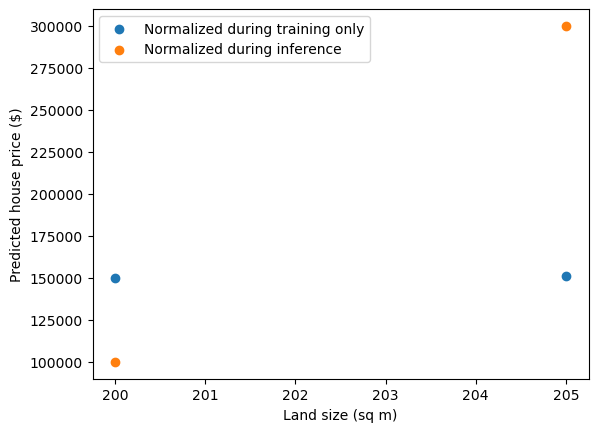

In [5]:
# super simple predictor
land_size = np.array([200, 205])
slope = 100000
offset = 200000

# normalize with training values
mu = 400
sigma = 400
X0 = (land_size - mu) / sigma

# normalize with test values
X1 = (land_size - land_size.mean()) / land_size.std()

# predict price
plt.scatter(land_size, X0 * slope + offset, label="Normalized during training only")
plt.scatter(land_size, X1 * slope + offset, label="Normalized during inference")
plt.legend()
plt.xlabel("Land size (sq m)")
plt.ylabel("Predicted house price ($)")

<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
C:\Users\ccurtis\AppData\Local\Temp\ipykernel_3032\2567037690.py:11: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(range(n_layers), var_layer, label=[f"$\sigma^2_W = {v}$" for v in W_vars])


Variance after 100 layers:
Initial        Final
0.001       1.6e-129
0.01         1.6e-30
0.02             1.0
0.1          1.6e+69
1.0         1.6e+168


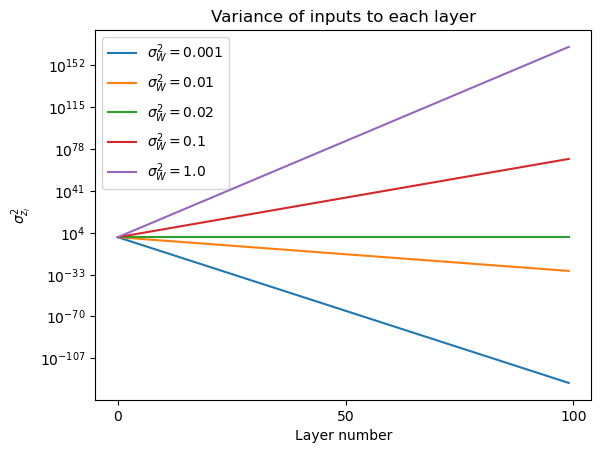

In [9]:
# hyperparameters to play with 
n_layers = 100
n_neurons_per_layer = 100
W_vars = np.array([0.001, 0.01, 0.02, 0.1, 1])

var_layer = np.zeros((n_layers, len(W_vars)))
var_layer[0, :] = 1
for l in range(1, n_layers):
    var_layer[l, :] = var_layer[l-1, :] * n_neurons_per_layer * W_vars / 2

plt.plot(range(n_layers), var_layer, label=[f"$\sigma^2_W = {v}$" for v in W_vars])
plt.yscale("log")
plt.xticks([0, n_layers / 2, n_layers])
plt.xlabel("Layer number")
plt.legend()
plt.ylabel(r"$\sigma^2_{z_l}$")
plt.title("Variance of inputs to each layer")

print(f"Variance after {n_layers} layers:")
print(f"Initial        Final")
for v in range(len(W_vars)):
    print(f"{W_vars[v]:<5}{var_layer[-1, v]:>15.2}")